In [4]:
import json

# Classes

In [5]:
json_str = '{"params1": 7, "params2": 14}'

In [7]:
class MyClass:
    def __init__(self, param1, param2):
        self.param1 = param1
        if param2 is None:
            param2 = 12.3
        self.param2 = param2
    
    def my_method(self, foo, bar):
        result = self.param2 * foo + self.param2 * bar
        return result

    def to_json(self):
        params = {
            'param1': self.param1,
            'param2': self.param2,
        }
        return json.dumps(params)
    
    @classmethod
    def from_json(cls, json_str):
        json_dict = json.loads(json_str)
        instance = cls(json_dict['params1'], json_dict['params2'])
        return instance

    
instance = MyClass(5, 18)
instance = MyClass.from_json(json_str)

# `sklearn` example

In [159]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

sns.set_style('white')
sns.set_context('talk')

In [119]:
make_regression?

In [120]:
X, y = make_regression(
    n_samples=50,
    n_features=10,
    n_informative=6,
    n_targets=1,
    noise=15,
    random_state=81,
    bias=20,
)

In [139]:
random_state = np.random.RandomState(123)
X = random_state.randn(1000, 1) * 2.0 + 1.0
X = X.clip(-5, 5)
y = X + 0.2 * X**2 - 0.1 * X**3 + random_state.randn(1000, 1) * 1


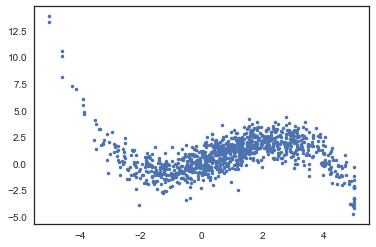

In [140]:
plt.plot(X[:, 0], y, '.')

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=737)

Model score: 0.0066


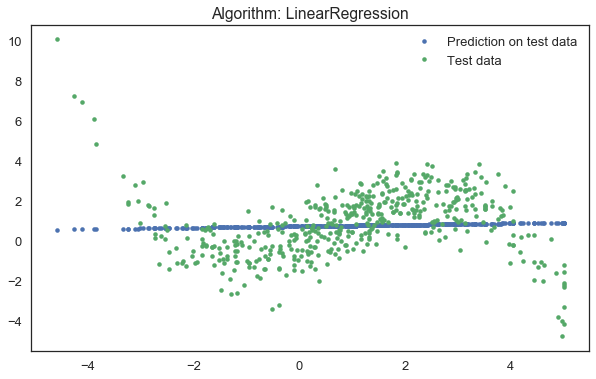

In [190]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Model score:', round(score, 4))

y_pred = model.predict(X_test)
with plt.rc_context(rc={'figure.figsize': (10, 6)}):
    plt.plot(X_test, y_pred, '.', label='Prediction on test data')
    plt.plot(X_test, y_test, '.', label='Test data')
    plt.legend()
    plt.title('Algorithm: ' + model.__class__.__name__)


/Users/berkes/miniconda3/envs/scratch/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score: 0.6144


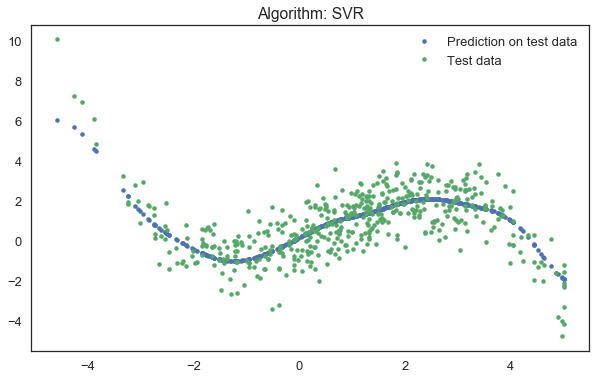

In [191]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Model score:', round(score, 4))

y_pred = model.predict(X_test)
with plt.rc_context(rc={'figure.figsize': (10, 6)}):
    plt.plot(X_test, y_pred, '.', label='Prediction on test data')
    plt.plot(X_test, y_test, '.', label='Test data')
    plt.legend()
    plt.title('Algorithm: ' + model.__class__.__name__)b
    

# Context managers structure

In [195]:
params = 0

In [204]:
from contextlib import contextmanager

@contextmanager
def my_context(params):
    print('Set up environment')
    try:
        yield  # Here the block of code is executed
    finally:
        print('Clean up environment')

with my_context(params):
    print('Do something interesting here')


Set up environment
Do something interesting here
Clean up environment


In [206]:
class MyContext:

    def __init__(self, params):
        self.params = params

    def __enter__(self):
        print('Set up environment')

    def __exit__(self, *args):
        # This is called even if there is an exception!
        print('Clean up environment')


with MyContext(params):
    print('Do something interesting here')


Set up environment
Do something interesting here
Clean up environment
